In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import segmentation_models_3D as sm
import custom_datagenerator as datagen
from unet_basic import simple_unet_model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import LearningRateScheduler

Segmentation Models: using `tf.keras` framework.


In [2]:
# Training weights
wt0 = 0.26;wt1 = 22.53;wt2 = 22.53;wt3 = 26.21
# Redefine the loss
dice_loss = sm.losses.DiceLoss(class_weights = np.array([wt0,wt1,wt2,wt3]))
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

In [3]:
### Get the required paths
# Training
train_img_path = "data_dir/trainval/train/images"
train_mask_path = "data_dir/trainval/train/masks"
train_img_list = sorted(os.listdir(train_img_path))
train_mask_list = sorted(os.listdir(train_mask_path))
# Validation
val_img_path = "data_dir/trainval/val/images"
val_mask_path = "data_dir/trainval/val/masks"
val_img_list = sorted(os.listdir(val_img_path))
val_mask_list = sorted(os.listdir(val_mask_path))

In [4]:
batch_size = 1

In [5]:
# Define the datagenerators
train_img_datagen = datagen.imageLoader(train_img_path, train_img_list, train_mask_path, train_mask_list,
                                       batch_size)

val_img_datagen = datagen.imageLoader(val_img_path, val_img_list, val_mask_path, val_mask_list,
                                       batch_size)

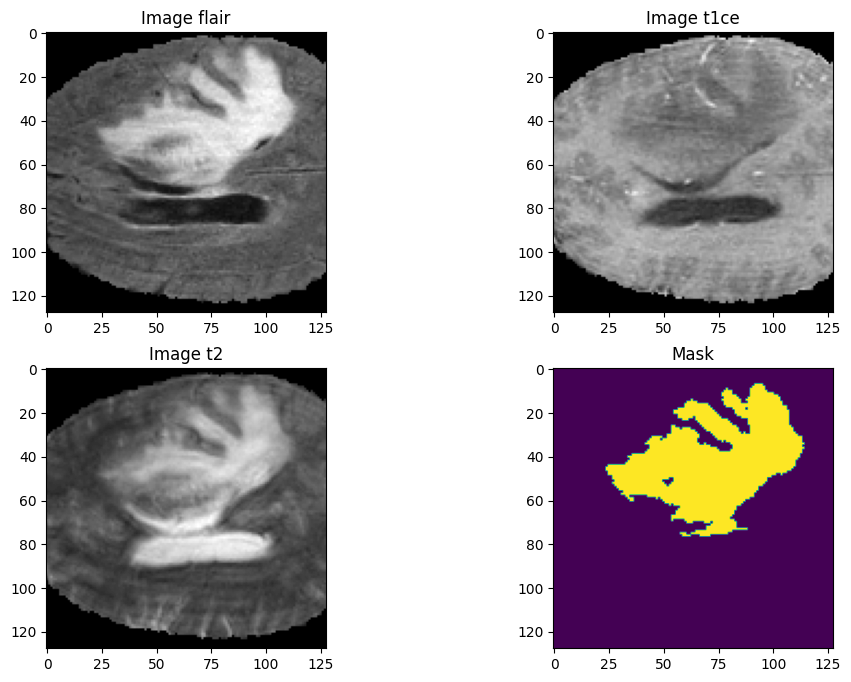

In [6]:
# Check that the generator works properly
#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [7]:
# Define the hyperparameters
metrics = ["accuracy", sm.metrics.IOUScore(threshold = 0.5)]
lr = 0.0001
optim = tf.keras.optimizers.Adam(lr)
train_steps = len(train_img_list) // batch_size
val_steps = len(val_img_list) // batch_size
batch_size = 1

In [8]:
from unet_attent import attention_unet_model
model = attention_unet_model(IMG_HEIGHT = 128,
                          IMG_WIDTH = 128,
                          IMG_DEPTH = 128,
                          IMG_CHANNELS = 3,
                          num_classes = 4)

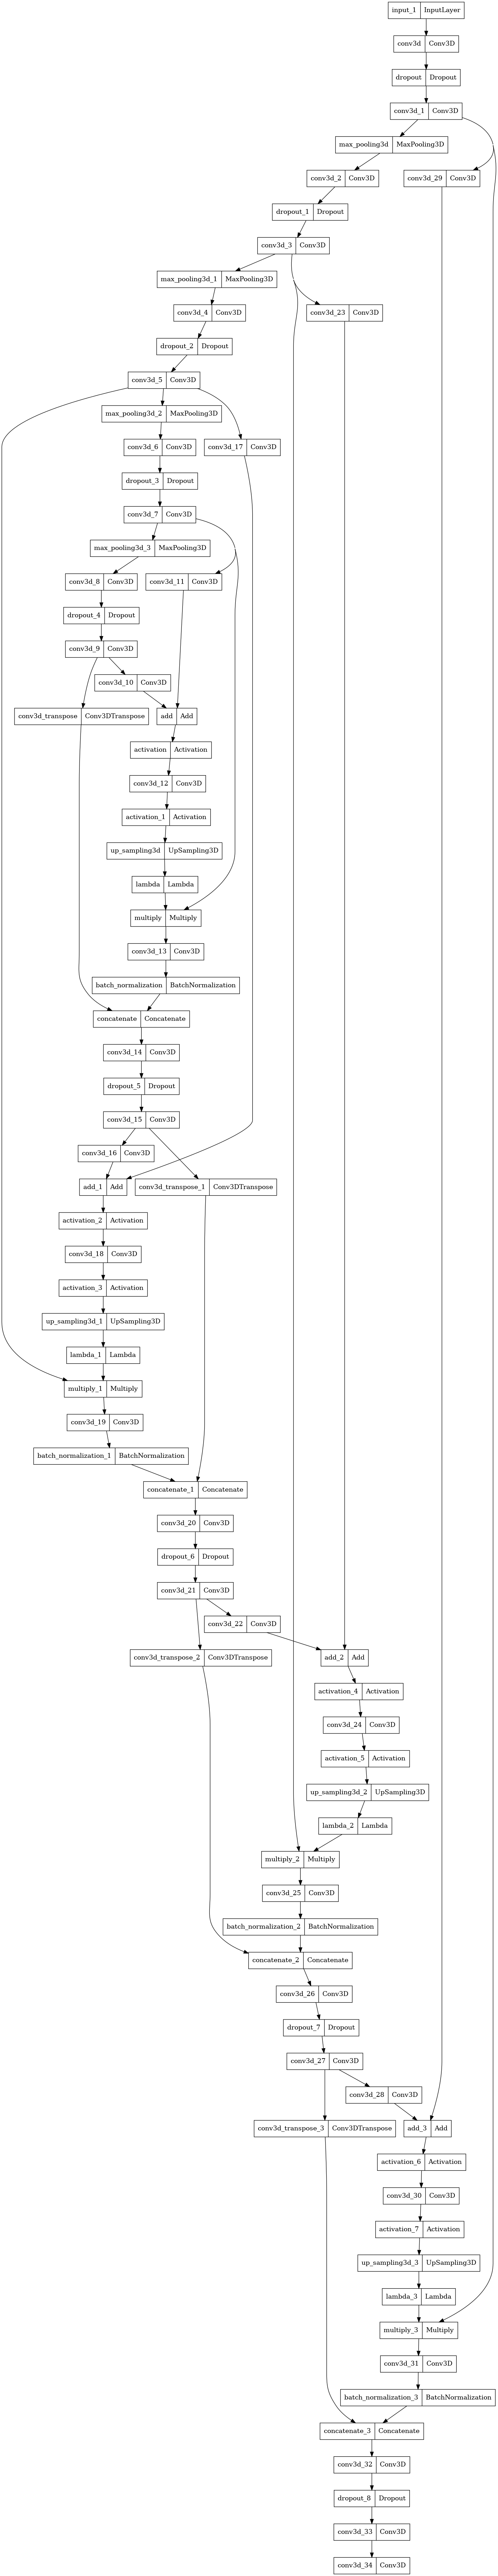

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [10]:
model.compile(optimizer = optim, loss = total_loss, metrics = metrics)

In [12]:
history = model.fit(train_img_datagen,
                   steps_per_epoch = train_steps,
                   validation_data = val_img_datagen,
                   validation_steps = val_steps,
                   epochs = 100, verbose = 1)

Epoch 1/100
258/258 [==============================] - 138s 496ms/step - loss: -2.6506 - accuracy: 0.8536 - iou_score: 0.3127 - val_loss: -3.1537 - val_accuracy: 0.9613 - val_iou_score: 0.3609
Epoch 2/100
258/258 [==============================] - 126s 487ms/step - loss: -5.8889 - accuracy: 0.9625 - iou_score: 0.4456 - val_loss: -3.5661 - val_accuracy: 0.8054 - val_iou_score: 0.3381
Epoch 3/100
258/258 [==============================] - 125s 484ms/step - loss: -6.6677 - accuracy: 0.9660 - iou_score: 0.4729 - val_loss: -5.1270 - val_accuracy: 0.9279 - val_iou_score: 0.4173
Epoch 4/100
258/258 [==============================] - 125s 484ms/step - loss: -7.0187 - accuracy: 0.9682 - iou_score: 0.4867 - val_loss: -4.8267 - val_accuracy: 0.9345 - val_iou_score: 0.4093
Epoch 5/100
258/258 [==============================] - 125s 484ms/step - loss: -7.4178 - accuracy: 0.9700 - iou_score: 0.5020 - val_loss: -5.3515 - val_accuracy: 0.9319 - val_iou_score: 0.4275
Epoch 6/100
258/258 [==============

258/258 [==============================] - 126s 488ms/step - loss: -12.0371 - accuracy: 0.9849 - iou_score: 0.7010 - val_loss: -9.2547 - val_accuracy: 0.9462 - val_iou_score: 0.5789
Epoch 44/100
258/258 [==============================] - 127s 492ms/step - loss: -12.2056 - accuracy: 0.9856 - iou_score: 0.7100 - val_loss: -9.6213 - val_accuracy: 0.9625 - val_iou_score: 0.5960
Epoch 45/100
258/258 [==============================] - 127s 492ms/step - loss: -11.9192 - accuracy: 0.9845 - iou_score: 0.6966 - val_loss: -9.1743 - val_accuracy: 0.9549 - val_iou_score: 0.5748
Epoch 46/100
258/258 [==============================] - 124s 481ms/step - loss: -12.1726 - accuracy: 0.9855 - iou_score: 0.7085 - val_loss: -9.4886 - val_accuracy: 0.9559 - val_iou_score: 0.5877
Epoch 47/100
258/258 [==============================] - 124s 482ms/step - loss: -12.2623 - accuracy: 0.9858 - iou_score: 0.7123 - val_loss: -9.7558 - val_accuracy: 0.9651 - val_iou_score: 0.6006
Epoch 48/100
258/258 [================

Epoch 85/100
258/258 [==============================] - 125s 484ms/step - loss: -13.2690 - accuracy: 0.9896 - iou_score: 0.7686 - val_loss: -10.1559 - val_accuracy: 0.9730 - val_iou_score: 0.6242
Epoch 86/100
258/258 [==============================] - 125s 483ms/step - loss: -13.3163 - accuracy: 0.9896 - iou_score: 0.7690 - val_loss: -10.1418 - val_accuracy: 0.9677 - val_iou_score: 0.6184
Epoch 87/100
258/258 [==============================] - 125s 483ms/step - loss: -13.2996 - accuracy: 0.9895 - iou_score: 0.7680 - val_loss: -10.2163 - val_accuracy: 0.9750 - val_iou_score: 0.6270
Epoch 88/100
258/258 [==============================] - 125s 484ms/step - loss: -13.4176 - accuracy: 0.9899 - iou_score: 0.7742 - val_loss: -10.3501 - val_accuracy: 0.9754 - val_iou_score: 0.6330
Epoch 89/100
258/258 [==============================] - 125s 485ms/step - loss: -13.2645 - accuracy: 0.9895 - iou_score: 0.7684 - val_loss: -9.8486 - val_accuracy: 0.9629 - val_iou_score: 0.6082
Epoch 90/100
258/258 

In [13]:
model.save("models/brats_3dAttention.hdf5")

In [14]:
# Setup the test generator
batch_size = 4
test_img_datagen = datagen.imageLoader(val_img_path, 
                                       val_img_list, 
                                       val_mask_path, 
                                       val_mask_list,
                                       batch_size)

In [15]:
# Testing the new generator
test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis = 4)
test_pred_batch = model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis = 4)

In [16]:
n_classes = 4
IoU_vals = tf.metrics.MeanIoU(num_classes=n_classes)
IoU_vals.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print(f"Mean IoU for one batch of test images {IoU_vals.result().numpy()}")

Mean IoU for one batch of test images 0.760917067527771


In [17]:
# Select a random image to test
test_img_file = np.random.choice(val_img_list)
# Get the number corresponding to the selected image
test_img_num = filter(str.isdigit, test_img_file)
test_img_num = "".join(test_img_num)

# load that image
test_img = np.load(val_img_path + "/" + test_img_file)
test_mask = np.load(val_mask_path + "/mask_" + str(test_img_num) + ".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

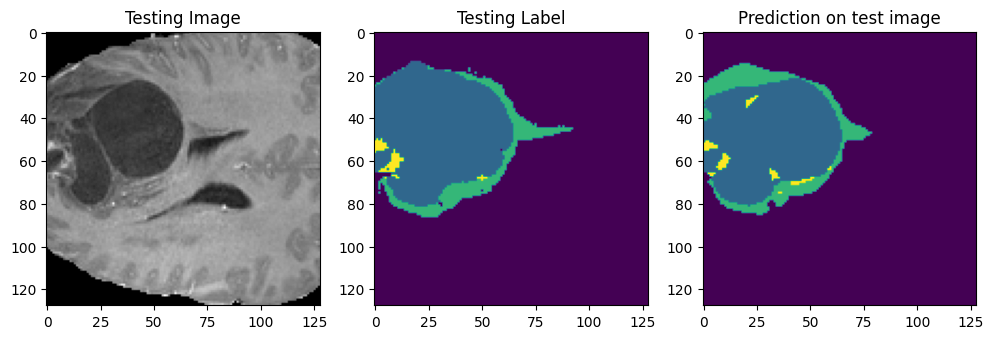

In [30]:
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 80
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()